<a href="https://colab.research.google.com/github/priyaking3803-tech/brain-tumour/blob/main/Brain_Tumor_MRI_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BRAIN TUMOUR 🧠

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir = '/content/drive/MyDrive/Tumour/train'
val_dir = '/content/drive/MyDrive/Tumour/valid'
test_dir = "/content/drive/MyDrive/Tumour/test"

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os


# Path to the zip file in your Google Drive
# The previous zip_path '/content/drive/MyDrive/tumour/Tumour/.' was a directory,
# not a zip file, causing an IsADirectoryError.
# Based on the file listing, it appears the data is already unzipped
# in '/content/drive/MyDrive/tumour/Tumour/'.

# If you still intend to extract a zip file, please ensure 'zip_path' points
# to an actual .zip file, e.g., '/content/drive/MyDrive/your_archive_name.zip'.
# For now, we will comment out the extraction part as the data seems to be
# already available.

# zip_path = "/content/drive/MyDrive/tumour/Tumour/." # This was the problematic line


# Destination path to extract
# Note: There might be a slight discrepancy in capitalization or directory structure
# for where the data is actually located vs. where this extract_path suggests.
# For example, the `ls` output indicates data at '/content/drive/MyDrive/tumour/Tumour',
# while other cells use '/content/drive/MyDrive/Tumour'.
extract_path = '/content/drive/MyDrive/Tumour'

# Extracting the zip file (commented out as it caused an error and data appears unzipped)
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

print("Extraction logic commented out. Please verify your data paths.")
# If the data is already unzipped, you can safely remove this cell or modify it
# to set the correct data directories if needed.

Extraction logic commented out. Please verify your data paths.


In [ ]:
!ls "/content/drive/MyDrive"

 371.odt
'BCom (1).PDF'
 brr.odt
'Business Reputation & Insights Analyzer using Google Maps Reviews + LLMs (1)[1].gdoc'
'ChiesaSerretti2009 (3).pdf'
'Colab Notebooks'
'Copy of ChocoCrunch Analytics.gdoc'
'Copy of Copy of 💎Diamond Dynamics: Price Prediction and Market Segmentation.gdoc'
'Copy of Copy of MDT70.gdoc'
'Copy of Data_visulization.ipynb'
'Copy of 💎Diamond Dynamics: Price Prediction and Market Segmentation.gdoc'
'Copy of EcoType: Forest Cover Classification.gdoc'
'Copy of intro_to_python_data_types_0107 (1).ipynb'
'Copy of intro_to_python_data_types_0107.ipynb'
'Copy of MDT70 (1).gdoc'
'Copy of MDT70.gdoc'
'Copy of Python Intro _300625.docx'
'Copy of Python Intro _300625.gdoc'
'Document from Priya King.pdf'
'Getting started.pdf'
 NME.docx
 photo.jpg
 QXSXZDD.odt
 README.dataset.gdoc
 README.dataset.txt
 Screenshot_20191106_180028.jpg
 tumour
'Untitled document.gdoc'


In [ ]:
!ls "/content/drive/MyDrive/tumour"
!ls "/content/drive/MyDrive/tumour/Tumour/test"
!ls "/content/drive/MyDrive/tumour/Tumour"

Tumour
_classes.csv  glioma  meningioma  no_tumor  pituitary
README.dataset.txt  test  train  valid


In [ ]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]

    # Data augmentation parameters
    rotation_range=20,  # Random rotation between -20 and +20 degrees
    width_shift_range=0.2,  # Random horizontal shift by ±20% of width
    height_shift_range=0.2,  # Random vertical shift by ±20% of height
    zoom_range=0.2,  # Random zoom between 80% and 120%
    horizontal_flip=True,  # Random horizontal flipping
    vertical_flip=False,  # No vertical flipping (can enable if appropriate)
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Validation and test generators (only rescaling, no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/content/drive/MyDrive/tumour/Tumour/train"
val_dir   = "/content/drive/MyDrive/tumour/Tumour/valid"
test_dir  = "/content/drive/MyDrive/tumour/Tumour/test"

# Set image size and batch size
img_width, img_height = 224, 224
batch_size = 32

# -------------------------------
# 1️⃣ Create data generators
# -------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# -------------------------------
# 2️⃣ Load dataset from folders
# -------------------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Classes:", train_generator.class_indices)

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 255 images belonging to 4 classes.
Classes: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [ ]:
test_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}

In [ ]:
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")

Class names: ['glioma', 'meningioma', 'no_tumor', 'pituitary']
Number of classes: 4


model buliding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,580 (627.27 KB)

 Trainable params: 160,132 (625.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 650s 12s/step - accuracy: 0.5017 - loss: 4.1231 - precision: 0.6144 - recall: 0.3286 - val_accuracy: 0.3250 - val_loss: 3.4387 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
 1/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5938 - loss: 2.8932 - precision: 0.6250 - recall: 0.4688

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.5938 - loss: 2.8932 - precision: 0.6250 - recall: 0.4688 - val_accuracy: 0.3167 - val_loss: 3.4240 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 601ms/step - accuracy: 0.6950 - loss: 2.6677 - precision: 0.7679 - recall: 0.5790 - val_accuracy: 0.3208 - val_loss: 3.2656 - val_precision: 0.3415 - val_recall: 0.3208
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7188 - loss: 2.0727 - precision: 0.8261 - recall: 0.5938 - val_accuracy: 0.3208 - val_loss: 3.3019 - val_precision: 0.3407 - val_recall: 0.3208
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 604ms/step - accuracy: 0.7054 - loss: 2.0434 - precision: 0.7746 - recall: 0.6004 - val_accuracy: 0.3562 - val_loss: 4.0394 - val_precision: 0.3543 - val_recall: 0.3521
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7188 - loss: 1.6492 - precision: 0.9167 - recall: 0.6875 - val_accuracy: 0.3292 - val_loss: 4.19

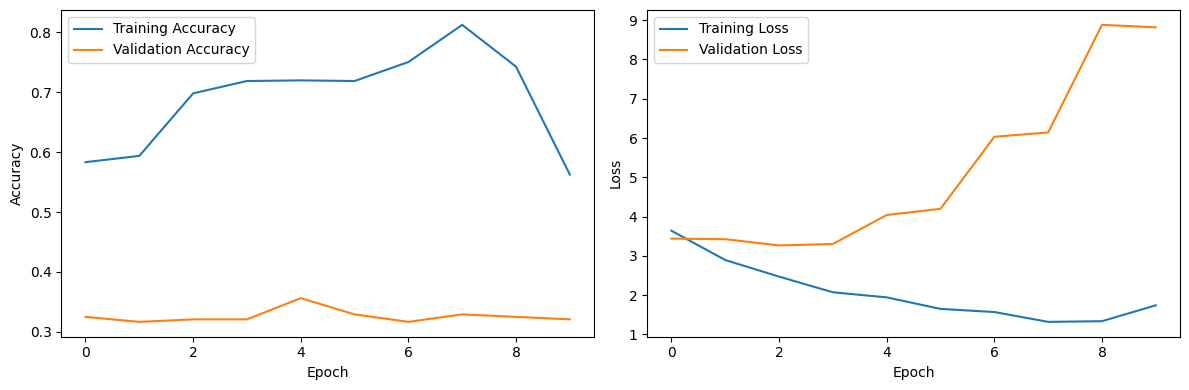

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 11s/step - accuracy: 0.5955 - loss: 5.7936 - precision: 0.5955 - recall: 0.5955

Test accuracy: 0.3137
Test precision: 0.3137
Test recall: 0.3137


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step


In [ ]:
true_classes = test_generator.classes

In [ ]:
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)
print('\nConfusion Matrix:')
print(conf_mat)


Classification Report:
              precision    recall  f1-score   support

      glioma       0.31      1.00      0.48        80
  meningioma       0.00      0.00      0.00        63
    no_tumor       0.00      0.00      0.00        58
   pituitary       0.00      0.00      0.00        54

    accuracy                           0.31       255
   macro avg       0.08      0.25      0.12       255
weighted avg       0.10      0.31      0.15       255


Confusion Matrix:
[[80  0  0  0]
 [63  0  0  0]
 [57  0  0  1]
 [54  0  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


learning model

In [ ]:
from tensorflow.keras.applications import (VGG16, ResNet50, MobileNet,
                                          InceptionV3, EfficientNetB0)
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_comparison = []

VGG16

In [ ]:
def evaluate_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')])

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

vgg_model, vgg_history = evaluate_vgg16()
model_comparison.append({
    'Model': 'VGG16',
    'Val Accuracy': max(vgg_history.history['val_accuracy']),
    'Val Precision': max(vgg_history.history['val_precision']),
    'Val Recall': max(vgg_history.history['val_recall']),
    'Parameters': f"{vgg_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Medium-sized datasets'
})

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.3279 - loss: 1.4157 - precision: 0.5127 - recall: 0.0081 - val_accuracy: 0.4841 - val_loss: 1.2230 - val_precision: 0.9615 - val_recall: 0.0498
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 641ms/step - accuracy: 0.4869 - loss: 1.1941 - precision: 0.8063 - recall: 0.1016 - val_accuracy: 0.5578 - val_loss: 1.1025 - val_precision: 0.7609 - val_recall: 0.2092
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 628ms/step - accuracy: 0.5636 - loss: 1.0843 - precision: 0.7933 - recall: 0.2306 - val_accuracy: 0.6315 - val_loss: 1.0102 - val_precision: 0.7432 - val_recall: 0.2191
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 626ms/step - accuracy: 0.6150 - loss: 0.9999 - precision: 0.7929 - recall: 0.2964 - val_accuracy: 0.6494 - val_loss: 0.9520 - val_precision: 0.8079 - val_recall: 0.3267
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 642ms/step - accuracy: 0.6182 - loss: 0.9754 - precision: 0.7973 -

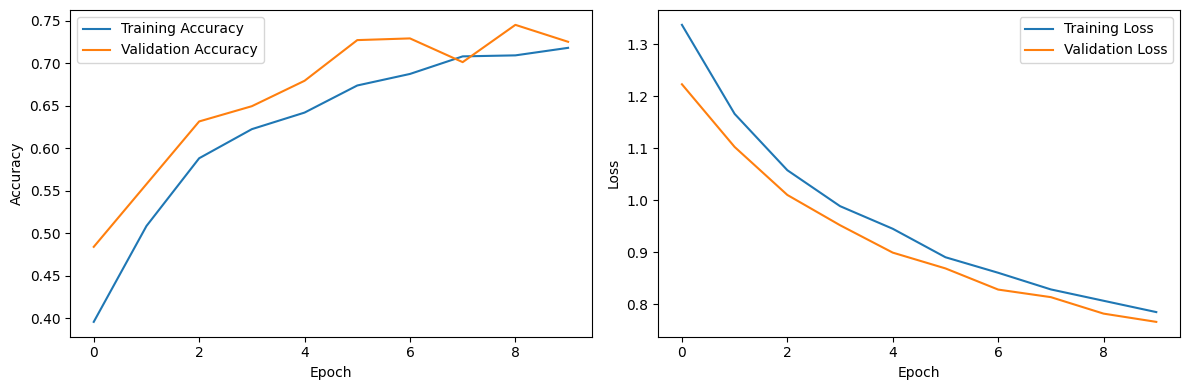

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.7194 - loss: 0.7246 - precision: 0.8781 - recall: 0.5577

Test accuracy: 0.7294
Test precision: 0.8758
Test recall: 0.5255
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step


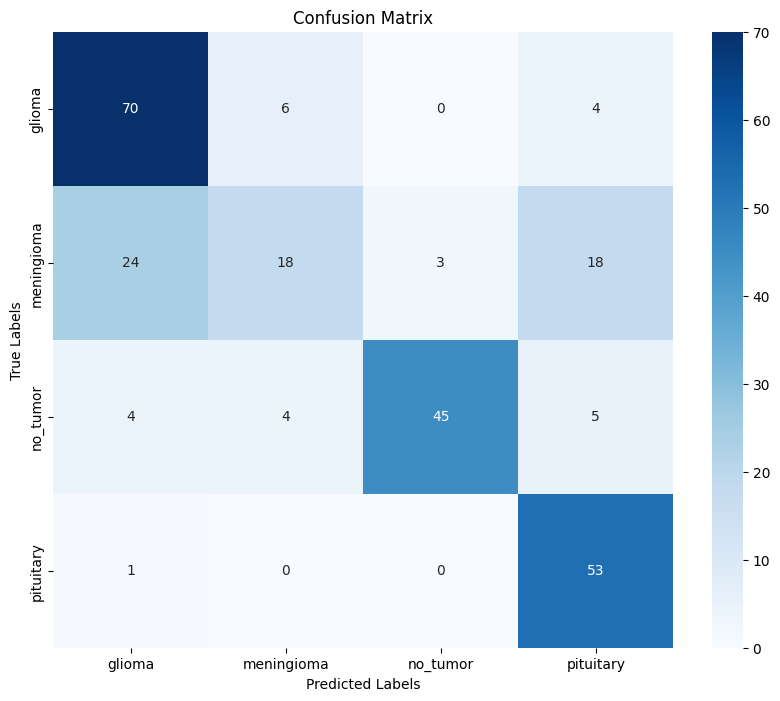

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(vgg_history)


# Evaluate on test set (assuming you have a test_generator)
test_generator.reset() # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = vgg_model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')


# Generate predictions
predictions = vgg_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Confusion Matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

RESENET50

In [ ]:
def evaluate_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

resnet_model, resnet_history = evaluate_resnet50()
model_comparison.append({
    'Model': 'ResNet50',
    'Val Accuracy': max(resnet_history.history['val_accuracy']),
    'Val Precision': max(resnet_history.history['val_precision']),
    'Val Recall': max(resnet_history.history['val_recall']),
    'Parameters': f"{resnet_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'General purpose'
})

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 877ms/step - accuracy: 0.3257 - loss: 1.4260 - precision: 0.4022 - recall: 0.0666 - val_accuracy: 0.3964 - val_loss: 1.2326 - val_precision: 0.7917 - val_recall: 0.0378
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.3807 - loss: 1.3034 - precision: 0.5528 - recall: 0.0584 - val_accuracy: 0.5677 - val_loss: 1.1877 - val_precision: 0.8605 - val_recall: 0.0737
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 601ms/step - accuracy: 0.4507 - loss: 1.2330 - precision: 0.6420 - recall: 0.0936 - val_accuracy: 0.5797 - val_loss: 1.1458 - val_precision: 0.8333 - val_recall: 0.0598
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 598ms/step - accuracy: 0.4764 - loss: 1.2030 - precision: 0.7724 - recall: 0.1035 - val_accuracy: 0.6215 - val_loss: 1.1166 - val_precision: 0.8409 - val_recall: 0.0737
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 622ms/step - accuracy: 0.5001 - loss: 1.1829 - precision: 0.787

MOBILENET

In [ ]:
def evaluate_mobilenet():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

mobilenet_model, mobilenet_history = evaluate_mobilenet()
model_comparison.append({
    'Model': 'MobileNet',
    'Val Accuracy': max(mobilenet_history.history['val_accuracy']),
    'Val Precision': max(mobilenet_history.history['val_precision']),
    'Val Recall': max(mobilenet_history.history['val_recall']),
    'Parameters': f"{mobilenet_model.count_params():,}",
    'Inference Time': 'Fast',
    'Best For': 'Mobile/Edge devices'
})

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 65s 975ms/step - accuracy: 0.4233 - loss: 1.4681 - precision: 0.4560 - recall: 0.2908 - val_accuracy: 0.7849 - val_loss: 0.5750 - val_precision: 0.8452 - val_recall: 0.7072
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 579ms/step - accuracy: 0.7444 - loss: 0.6738 - precision: 0.8033 - recall: 0.6745 - val_accuracy: 0.8267 - val_loss: 0.4952 - val_precision: 0.8600 - val_recall: 0.7590
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 611ms/step - accuracy: 0.8094 - loss: 0.4791 - precision: 0.8628 - recall: 0.7535 - val_accuracy: 0.8606 - val_loss: 0.3996 - val_precision: 0.9055 - val_recall: 0.8207
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 570ms/step - accuracy: 0.8379 - loss: 0.4340 - precision: 0.8722 - recall: 0.8073 - val_accuracy: 0.8645 - val_loss: 0.3927 - val_precision: 0.8994 - val_recall: 0.8367
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 626ms/step - accuracy: 0.8695 - loss: 0.3634 - precision: 0.895

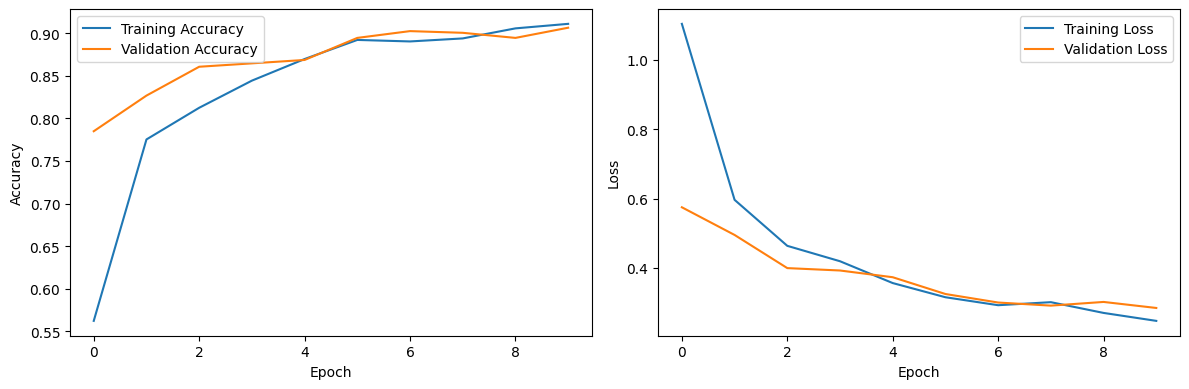

In [ ]:
plot_history(mobilenet_history)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.9002 - loss: 0.2682 - precision: 0.9112 - recall: 0.8732

MobileNet Test accuracy: 0.8980
MobileNet Test precision: 0.9098
MobileNet Test recall: 0.8706


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 490ms/step


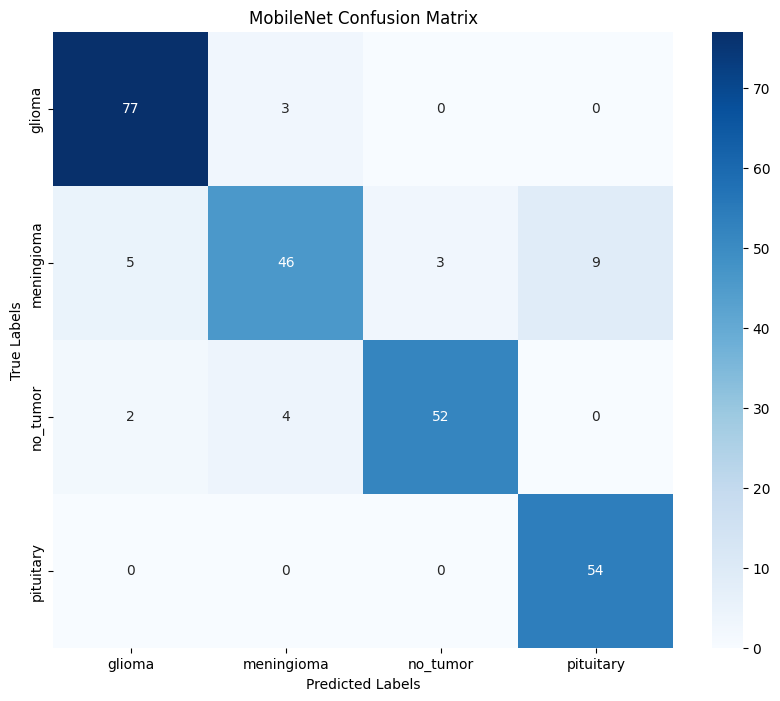

In [ ]:
test_generator.reset()  # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = mobilenet_model.evaluate(test_generator)
print(f'\nMobileNet Test accuracy: {test_acc:.4f}')
print(f'MobileNet Test precision: {test_precision:.4f}')
print(f'MobileNet Test recall: {test_recall:.4f}')

# Generate predictions for MobileNet
predictions = mobilenet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes for MobileNet
true_classes = test_generator.classes

# Confusion Matrix for MobileNet
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix for MobileNet using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MobileNet Confusion Matrix')
plt.show()

InceptionV3

In [ ]:
def evaluate_inception():
    # Special generator for Inception's 299x299 input
    inception_train_gen = train_datagen.flow_from_directory(
        train_dir, target_size=(299, 299), batch_size=batch_size)
    inception_val_gen = val_datagen.flow_from_directory(
        val_dir, target_size=(299, 299), batch_size=batch_size)

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(299, 299, 3))
    x = tf.keras.applications.inception_v3.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        inception_train_gen,
        validation_data=inception_val_gen,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

inception_model, inception_history = evaluate_inception()
model_comparison.append({
    'Model': 'InceptionV3',
    'Val Accuracy': max(inception_history.history['val_accuracy']),
    'Val Precision': max(inception_history.history['val_precision']),
    'Val Recall': max(inception_history.history['val_recall']),
    'Parameters': f"{inception_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Multi-scale features'
})

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.3490 - loss: 1.3264 - precision: 0.5138 - recall: 0.0498 - val_accuracy: 0.5837 - val_loss: 1.1659 - val_precision: 0.7115 - val_recall: 0.1474
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 883ms/step - accuracy: 0.5189 - loss: 1.1611 - precision: 0.7084 - recall: 0.1559 - val_accuracy: 0.5916 - val_loss: 1.0597 - val_precision: 0.7733 - val_recall: 0.2649
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 890ms/step - accuracy: 0.5374 - loss: 1.1103 - precision: 0.6948 - recall: 0.2192 - val_accuracy: 0.6096 - val_loss: 0.9962 - val_precision: 0.8028 - val_recall: 0.3406
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 869ms/step - accuracy: 0.5608 - loss: 1.0777 - precision: 0.7444 - recall: 0.2828 - val_accuracy: 0.6275 - val_loss: 0.9753 - val_precision: 0.7821 - val_recall: 0.3645
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 883ms/step - accuracy: 0.5703 - loss: 1.0550 - precision: 0.7537 - recall: 0.2946 - val_accuracy: 0.6454 - val_loss: 

 EfficientNet

In [ ]:
def evaluate_efficientnet():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data= validation_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

efficientnet_model, efficientnet_history = evaluate_efficientnet()
model_comparison.append({
    'Model': 'EfficientNetB0',
    'Val Accuracy': max(efficientnet_history.history['val_accuracy']),
    'Val Precision': max(efficientnet_history.history['val_precision']),
    'Val Recall': max(efficientnet_history.history['val_recall']),
    'Parameters': f"{efficientnet_model.count_params():,}",
    'Inference Time': 'Fast',
    'Best For': 'Best accuracy/efficiency tradeoff'
})

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.3135 - loss: 1.3806 - precision: 0.5154 - recall: 0.0030 - val_accuracy: 0.3207 - val_loss: 1.3892 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 555ms/step - accuracy: 0.3044 - loss: 1.3902 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3207 - val_loss: 1.3877 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 571ms/step - accuracy: 0.3012 - loss: 1.3811 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3207 - val_loss: 1.3834 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.2757 - loss: 1.3877 - precision: 0.1387 - recall: 0.0043 - val_accuracy: 0.2351 - val_loss: 1.4022 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 566ms/step - accur

In [ ]:
import pandas as pd
comparison_df = pd.DataFrame(model_comparison)
comparison_df = comparison_df.sort_values('Val Accuracy', ascending=False)
comparison_df.style.background_gradient(cmap='Blues', subset=['Val Accuracy', 'Val Precision', 'Val Recall'])

,Model,Val Accuracy,Val Precision,Val Recall,Parameters,Inference Time,Best For
2,MobileNet,0.906375,0.914110,0.896414,"3,232,964",Fast,Mobile/Edge devices
0,VGG16,0.745020,0.961538,0.498008,"14,716,740",Medium,Medium-sized datasets
3,InceptionV3,0.667331,0.802817,0.501992,"21,810,980",Medium,Multi-scale features
1,ResNet50,0.633466,0.860465,0.336653,"23,595,908",Medium,General purpose
4,EfficientNetB0,0.320717,0.000000,0.000000,"4,054,695",Fast,Best accuracy/efficiency tradeoff


In [ ]:
comparison_df.to_csv('/content/drive/MyDrive/model_comparison.csv', index=False)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/model_comparison.csv')
df

,Model,Val Accuracy,Val Precision,Val Recall,Parameters,Inference Time,Best For
0,MobileNet,0.906375,0.914110,0.896414,"3,232,964",Fast,Mobile/Edge devices
1,VGG16,0.745020,0.961538,0.498008,"14,716,740",Medium,Medium-sized datasets
2,InceptionV3,0.667331,0.802817,0.501992,"21,810,980",Medium,Multi-scale features
3,ResNet50,0.633466,0.860465,0.336653,"23,595,908",Medium,General purpose
4,EfficientNetB0,0.320717,0.000000,0.000000,"4,054,695",Fast,Best accuracy/efficiency tradeoff


The best performing model is:
Model                       MobileNet
Val Accuracy                 0.906375
Val Precision                 0.91411
Val Recall                   0.896414
Parameters                  3,232,964
Inference Time                   Fast
Best For          Mobile/Edge devices
Name: 0, dtype: object


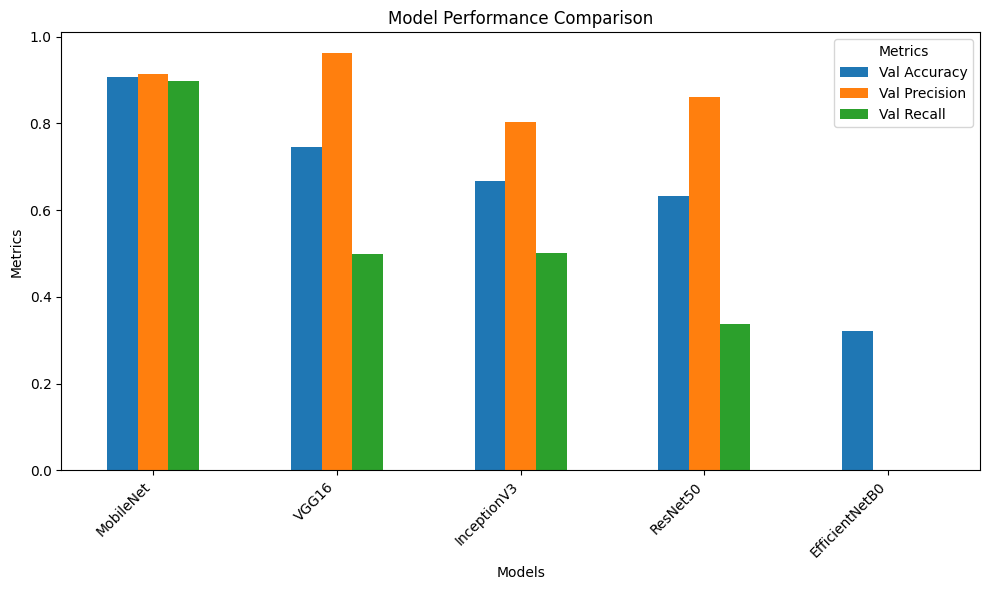

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/model_comparison.csv')


# Find the best model based on validation accuracy
best_model = df.loc[df['Val Accuracy'].idxmax()]

print(f"The best performing model is:\n{best_model}")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
df.plot(x='Model', y=['Val Accuracy', 'Val Precision', 'Val Recall'], kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metrics')
plt.xlabel('Models')


plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
mobilenet_model.save('/content/drive/MyDrive/model.h5')

In [ ]:
!pip install streamlit numpy pillow tensorflow

In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import os


classes = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Load the trained model
@st.cache_resource
def load_custom_model():
    model_path = '/content/drive/MyDrive/model.h5'
    if not os.path.exists(model_path):
        st.error(f"Model file not found at {model_path}")
        return None
    return load_model(model_path)

model = load_custom_model()

# Streamlit app
st.title("🧠 Brain Tumor MRI Image Classification  ")
st.write(f"Upload a Tumour to classify")

# File uploader
uploaded_file = st.file_uploader("Choose an image...",
                                type=["jpg", "jpeg", "png"])

if uploaded_file is not None and model is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    image = image.resize((224, 224))  # Match your model's expected input
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Normalize (if your model expects this)
    image_array = np.expand_dims(image_array, axis=0)

    # Make prediction
    with st.spinner('Identifying Tumour...'):
        predictions = model.predict(image_array)
        predicted_class = classes[np.argmax(predictions)]
        confidence = np.max(predictions)


    # Display results
    st.subheader("Predicted Results:")
    st.success(f"Tumour: {predicted_class}")
    st.info(f"Confidence: {confidence*100:.2f}%")

    # Show all class probabilities
    st.subheader("All Class Probabilities:")
    for i, (cls, prob) in enumerate(zip(classes, predictions[0])):
        st.write(f"{cls}: {prob*100:.2f}%")
        st.progress(float(prob))

Overwriting app.py


In [ ]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-11-20 11:14:43--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-20 11:14:44--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-20T12%3A04%3A07Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-20

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &  # here instead of app.py please rename with your file name

In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://annotated-superintendent-enters-realty.trycloudflare.com
